<a href="https://colab.research.google.com/github/jattFaizan423/Real-state-Project/blob/main/feature_engeenring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/gurgaon_properties_cleaned_v1.csv')

In [ ]:
df.duplicated().sum()

np.int64(122)

In [ ]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 43,5.25,27132.0,1935.0,Plot area 215(179.77 sq.m.),4,4,2,"study room,servant room",2.0,not available,10+ Year Old,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['4 Wardrobe', '4 Fan', '4 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Waste Disposal', 'Rain Water Harvesting']"


# **1. areaWithType**

In [ ]:
df.head(5)[['price','area','areaWithType']]

,price,area,areaWithType
0,5.25,1935.0,Plot area 215(179.77 sq.m.)
1,6.10,2430.0,Plot area 270(225.75 sq.m.)
2,0.74,1345.0,Super Built up area 1337(124.21 sq.m.)
3,1.90,2059.0,Carpet area: 2059 (191.29 sq.m.)
4,1.40,926.0,Super Built up area 145Carpet area: 86 sq.m.


In [ ]:
df['areaWithType'].value_counts()

,count
areaWithType,
Plot area 360(301.01 sq.m.),37
Plot area 300(250.84 sq.m.),26
Plot area 502(419.74 sq.m.),19
Plot area 200(167.23 sq.m.),19
Super Built up area 1950(181.16 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),17
Super Built up area 1350(125.42 sq.m.),17
Plot area 270(225.75 sq.m.),17
Super Built up area 1578(146.6 sq.m.),17
Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),15


In [ ]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [ ]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [ ]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [ ]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [ ]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.25,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
1,6.10,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
2,0.74,flat,1345.0,Super Built up area 1337(124.21 sq.m.),1337.0,NaN,NaN
3,1.90,flat,2059.0,Carpet area: 2059 (191.29 sq.m.),NaN,NaN,2059.0
4,1.40,flat,926.0,Super Built up area 145Carpet area: 86 sq.m.,145.0,NaN,86.0


In [ ]:
df.duplicated().sum()

np.int64(122)

In [ ]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [ ]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.25,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
1,6.10,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
6,0.75,house,713.0,Plot area 713(66.24 sq.m.),NaN,NaN,NaN
12,2.00,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
14,4.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [ ]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [ ]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.25,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
1,6.10,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
6,0.75,house,713.0,Plot area 713(66.24 sq.m.),NaN,NaN,NaN
12,2.00,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
14,4.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN


In [ ]:
  all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [ ]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [ ]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [ ]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,5.25,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
1,6.10,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
6,0.75,house,713.0,Plot area 713(66.24 sq.m.),NaN,713.00,NaN
12,2.00,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
14,4.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
42,13.50,house,3618.0,Plot area 402(336.12 sq.m.),NaN,402.00,NaN
47,3.85,house,2628.0,Plot area 292(244.15 sq.m.),NaN,292.00,NaN
72,5.50,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,1000.00,NaN
83,NaN,house,NaN,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
106,7.85,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN


In [ ]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [ ]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [ ]:
# update the original dataframe
df.update(all_nan_df)

In [ ]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [ ]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 43,5.25,27132.0,1935.0,Plot area 215(179.77 sq.m.),4,4,2,"study room,servant room",2.0,not available,10+ Year Old,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['4 Wardrobe', '4 Fan', '4 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Waste Disposal', 'Rain Water Harvesting']",NaN,1935.0,NaN


# **2.additionalRoom**

In [ ]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1587
servant room,705
study room,250
others,225
pooja room,165
"study room,servant room",99
store room,99
"pooja room,servant room",82
"pooja room,study room,servant room,store room",72


In [ ]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [ ]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3237,"study room,servant room,store room,pooja room",1,1,1,1,0
3764,not available,0,0,0,0,0
2268,"study room,servant room,store room",1,1,1,0,0
1010,not available,0,0,0,0,0
2414,servant room,0,1,0,0,0


# **3.agePossession**

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1676
5 to 10 Year Old,575
0 to 1 Year Old,530
undefined,332
10+ Year Old,310
Under Construction,90
Within 6 months,69
Within 3 months,26
Dec-23,22


In [ ]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [ ]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1676
New Property,625
Moderately Old,575
Undefined,484
Old Property,310
Under Construction,132


In [ ]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 43,5.25,27132.0,1935.0,Plot area 215(179.77 sq.m.),4,4,2,"study room,servant room",2.0,not available,Old Property,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['4 Wardrobe', '4 Fan', '4 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Waste Disposal', 'Rain Water Harvesting']",NaN,1935.0,NaN,1,1,0,0,0


# **4.furnishDetails**

In [ ]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
615,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
2366,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '12 Light', '7 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1250,NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Club house / Community Center', 'Rain Water Harvesting']"
469,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2655,"['6 Fan', '8 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"


In [ ]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2445438592.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [ ]:
furnishings_df.shape

(3802, 19)

In [ ]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/tmp/ipython-input-114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [ ]:
furnishings_df.sample(2)

,Washing Machine,Exhaust Fan,Wardrobe,Stove,Sofa,TV,Bed,Light,Curtains,Modular Kitchen,Water Purifier,Dining Table,Chimney,AC,Fan,Geyser,Fridge,Microwave
638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2834,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

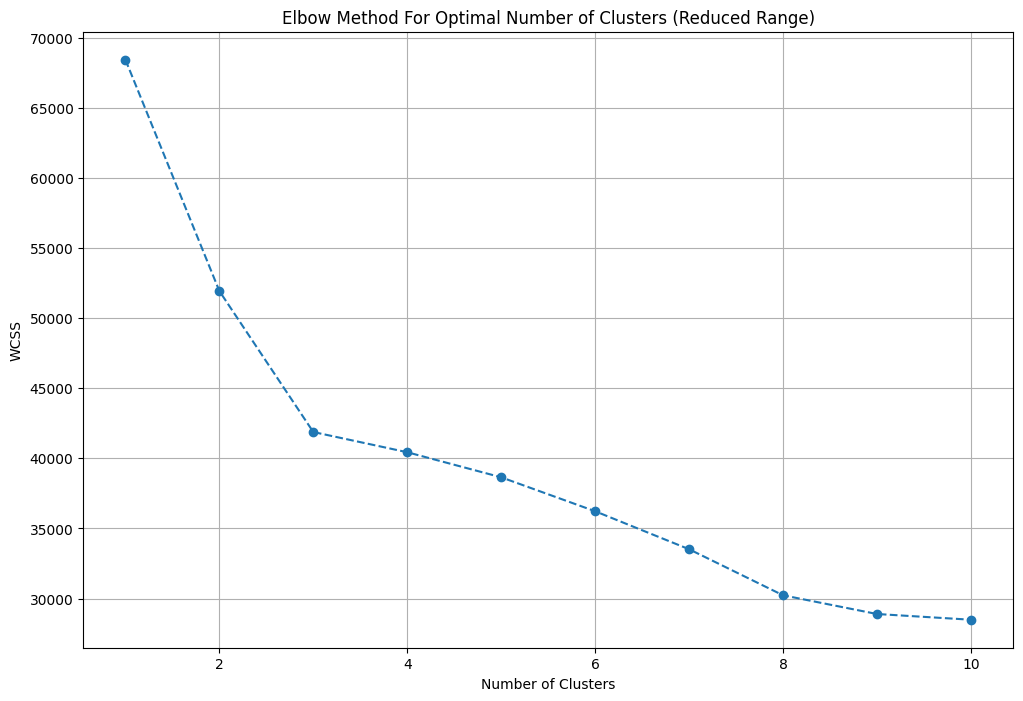

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [ ]:
df = df.iloc[:,:-18]

In [ ]:
df['furnishing_type'] = cluster_assignments

In [ ]:
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
3782,"['4 Wardrobe', '4 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '7 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
1729,NaN,1
1276,"['5 Wardrobe', '15 Fan', '1 Exhaust Fan', '5 Geyser', '21 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
2459,"['1 Water Purifier', '16 Fan', '1 Fridge', '1 Dining Table', '1 Microwave', '16 Light', '12 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Exhaust Fan', 'No Geyser', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",2
1548,NaN,1


# **5.features**

In [ ]:
df[['society','features']].sample(5)

,society,features
424,m3m golfestate,NaN
2323,godrej icon,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1481,ansal sushant lok 2,"['Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
2054,dlf regency park,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Spacious Interiors', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
1232,ats tourmaline,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [ ]:
df['features'].isnull().sum()

np.int64(635)

In [ ]:
app_df = pd.read_csv('/content/appartments.csv')

In [ ]:
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [ ]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [ ]:
temp_df = df[df['features'].isnull()]

In [ ]:
temp_df.shape

(635, 26)

In [ ]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [ ]:
df.loc[temp_df.index,'features'] = x.values

In [ ]:
df['features'].isnull().sum()

np.int64(481)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [ ]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [ ]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1120,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
1249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3588,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
features_binary_df.shape

(3802, 130)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

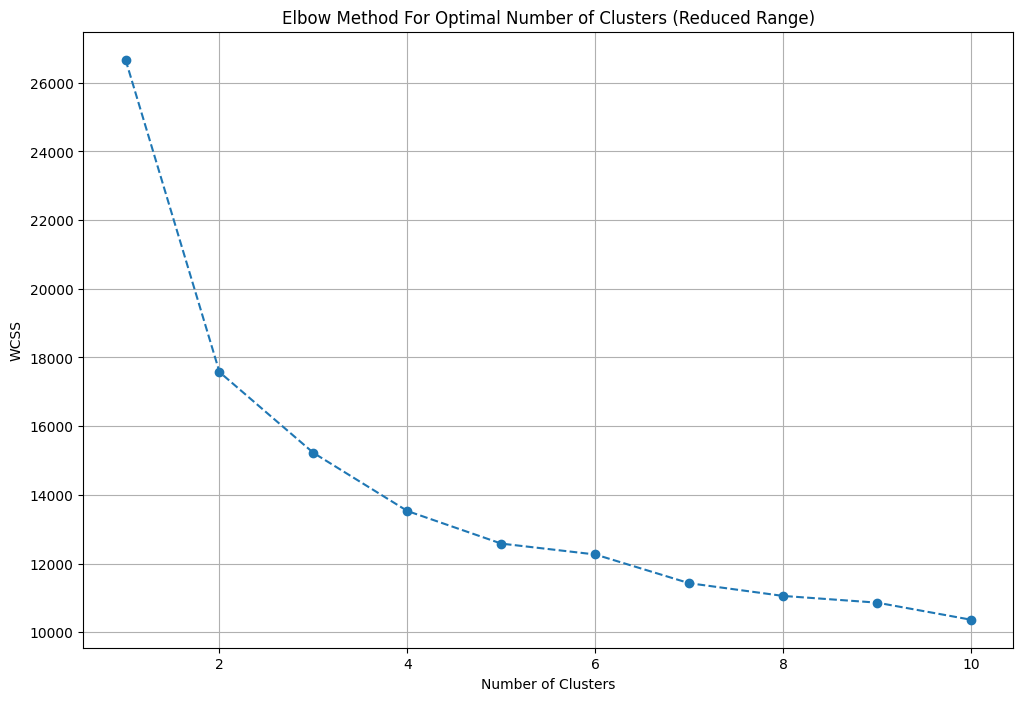

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [ ]:
df['luxury_score'] = luxury_score

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 43,5.25,27132.0,1935.0,Plot area 215(179.77 sq.m.),4,4,2,"study room,servant room",2.0,not available,Old Property,"['Sector 42-43 metro station', 'Huda city centre metro station', 'Hanuman Mandir', 'New Life Church', 'Hdfc ATM', 'Rbs ATM', 'Hdfc bank ATM', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Paras Hospital Gurgaon', 'Gupta', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Dr. Kutbuddin Akbary', 'Max Hospital', 'Sitaram Bhartia', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Icici bank', 'Hdfc bank', 'Axis bank', 'PWO house', 'Balaji Vegetarian Paradise', 'The Chicken Boat', 'Sagar Ratna', 'Cafe Tonini', 'Shophouse by Kylin', ""Carl's Jr."", 'Starbucks', 'Naveidyam', 'Starbucks', 'Blue Tokai Coffee Roasters', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Clock tower', 'Stones2milestones', 'School of Inspired Leadership SOIL', 'Ncr library', 'Bahrisons library']","['4 Wardrobe', '4 Fan', '4 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Waste Disposal', 'Rain Water Harvesting']",NaN,1935.0,NaN,1,1,0,0,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Private Garden / Terrace, Water purifier, High Ceiling Height, False Ceiling Lighting, Water Storage, Park, Visitor Parking, Internet/wi-fi connectivity, Waste Disposal, Rain Water Harvesting]",80
1,house,international city by sobha phase 1,sector 109,6.10,25103.0,2430.0,Plot area 270(225.75 sq.m.),5,6,3+,servant room,2.0,not available,Moderately Old,"['Dwarka sector 21 metro station', 'Pacific D21 Mall', 'Dharampeth Main Road', 'Dwarka Expressway', 'The Shikshiyan School', 'The NorthCap University', ""Rion's Hospital"", 'Indira Gandhi International Airport', 'Gurgaon railway station', 'The Executive Centre', 'Luxus Haritma Resort', ""Oyster's Water Park"", 'BSF Golf Course']",NaN,"['Maintenance Staff', 'Separate entry for servant room', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,2430.0,NaN,0,1,0,0,0,1,"[Maintenance Staff, Separate entry for servant room, Park, Fitness Centre / GYM, Club house / Community Center]",30
2,flat,unitech sunbreeze,sector 69,0.74,5500.0,1345.0,Super Built up area 1337(124.21 sq.m.),3,3,1,servant room,10.0,not available,Under Construction,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Sai Dharamraj Hospital', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sanjeevani Hospital Gurgaon', 'Gobind Hospital', 'Kamal Hospital and Maternity Centre', 'Divine Look Clinic Centre', 'Skin Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Neelkanth Health Care', 'Vishesh Dental', 'Bones Clinic - Orthopaedics', 'Park Hospital Gurgaon', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'Central bank of india', 'Union bank of india', 'Indusind bank', 'State bank of india', 'Hdfc bank', 'Icici bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'SRS Cinemas', 'Nook', 'Starbucks', ""Nirula's"", ""Domino's Pizza"",

In [ ]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [ ]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2874,flat,mvn athens,sohna road,0.27,5901.0,458.0,Carpet area: 457.52 (42.5 sq.m.),2,2,1,0.0,not available,Relatively New,NaN,NaN,457.46575,0,0,0,0,0,0,69
1902,flat,tulip violet,sector 69,1.85,9203.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,14.0,North-East,Relatively New,2010.0,NaN,NaN,0,0,0,0,0,0,157
986,house,emaar mgf marbella,sector 66,8.70,38667.0,2250.0,Plot area 250(209.03 sq.m.)Built Up area: 267 sq.yards (223.25 sq.m.),4,5,2,3.0,East,New Property,NaN,267.0,NaN,1,1,0,0,0,1,144
1162,house,independent,sector 43,2.25,7500.0,3000.0,Plot area 550(51.1 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.),11,11,3+,5.0,West,New Property,NaN,3000.0,NaN,0,0,0,0,1,2,28
3227,house,independent,sector 3 phase 3 extension,0.50,11111.0,450.0,Plot area 450(41.81 sq.m.),5,3,3,3.0,not available,Moderately Old,NaN,450.0,NaN,0,0,0,0,0,1,0


In [ ]:
df.shape

(3802, 23)

In [ ]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)